In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)

In [3]:
crime=pd.read_csv('C:/Users/HP/Desktop/Learning-2023/Phase 4 crime data.csv')
crime

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,ROBBERY,THEFT,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,50,46,41,199,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,23,53,16,366,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,27,59,14,723,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,20,25,4,173,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,23,49,25,1021,6507
...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,7,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,7,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,3,81,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,7,17,13,577,3494


In [4]:
crime.shape

(9017, 9)

In [6]:
crime.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'RAPE',
       'KIDNAPPING & ABDUCTION', 'ROBBERY', 'THEFT', 'TOTAL IPC CRIMES'],
      dtype='object')

In [7]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   STATE/UT                9017 non-null   object
 1   DISTRICT                9017 non-null   object
 2   YEAR                    9017 non-null   int64 
 3   MURDER                  9017 non-null   int64 
 4   RAPE                    9017 non-null   int64 
 5   KIDNAPPING & ABDUCTION  9017 non-null   int64 
 6   ROBBERY                 9017 non-null   int64 
 7   THEFT                   9017 non-null   int64 
 8   TOTAL IPC CRIMES        9017 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 634.1+ KB


In [8]:
crime.describe()

,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,ROBBERY,THEFT,TOTAL IPC CRIMES
count,9017.000000,9017.00000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000
mean,2006.629034,89.28535,53.041366,79.152046,55.066430,776.428968,5310.115116
std,3.463623,327.27503,190.741450,317.630964,220.576876,2935.008640,18524.381119
min,2001.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.00000,8.000000,10.000000,6.000000,88.000000,853.000000
50%,2007.000000,38.00000,20.000000,25.000000,17.000000,217.000000,2096.000000
75%,2010.000000,66.00000,41.000000,56.000000,37.000000,466.000000,3972.000000
max,2012.000000,7601.00000,3425.000000,8878.000000,6949.000000,53449.000000,220335.000000


In [10]:
crime.isnull().sum()

STATE/UT                  0
DISTRICT                  0
YEAR                      0
MURDER                    0
RAPE                      0
KIDNAPPING & ABDUCTION    0
ROBBERY                   0
THEFT                     0
TOTAL IPC CRIMES          0
dtype: int64

In [11]:
index_name=crime[crime['DISTRICT']=='TOTAL'].index #dropping the DISTRICT WHICH SHOWS VALUE AS TOTAL
crime.drop(index_name, inplace=True)
crime

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,ROBBERY,THEFT,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,50,46,41,199,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,23,53,16,366,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,27,59,14,723,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,20,25,4,173,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,23,49,25,1021,6507
...,...,...,...,...,...,...,...,...,...
9010,DELHI UT,STF,2012,0,0,0,0,0,6
9011,DELHI UT,WEST,2012,52,79,454,52,2352,5558
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,7,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,3,81,787


In [12]:
#crime=crime[['STATE/UT','YEAR','MURDER','KIDNAPPING & ABDUCTION','THEFT']].copy()

In [13]:
n = pd.DataFrame(crime.groupby(['YEAR']).sum().reset_index())
n

,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,ROBBERY,THEFT,TOTAL IPC CRIMES
0,2001,36749,16456,24114,20525,272079,1823692
1,2002,35821,16776,23173,19266,264087,1829467
2,2003,33201,16337,21148,17953,260781,1763524
3,2004,34089,18784,24536,18919,292039,1885633
4,2005,33174,19017,24422,18183,291066,1878667
5,2006,32957,19971,25433,18997,291852,1936256
6,2007,32813,21335,29249,19693,302080,2045738
7,2008,33320,21933,31828,21063,335628,2142729
8,2009,32921,21866,36396,22924,345926,2171596
9,2010,33900,22679,41648,23992,353400,2276123


In [14]:
rape = pd.DataFrame(crime.groupby(['YEAR'])['RAPE'].sum().reset_index())
rape.columns = ['YEAR','RAPE']
rape

,YEAR,RAPE
0,2001,16456
1,2002,16776
2,2003,16337
3,2004,18784
4,2005,19017
5,2006,19971
6,2007,21335
7,2008,21933
8,2009,21866
9,2010,22679


Text(0, 0.5, 'RAPE')

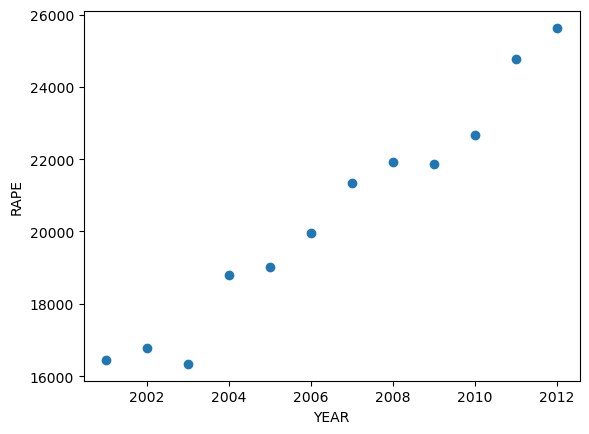

In [15]:
plt.scatter(rape.YEAR,rape['RAPE'])
plt.xlabel('YEAR')
plt.ylabel('RAPE')

In [16]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(rape[['YEAR','RAPE']])
y_predicted

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [17]:
rape['cluster']=y_predicted
rape.head()

,YEAR,RAPE,cluster
0,2001,16456,1
1,2002,16776,1
2,2003,16337,1
3,2004,18784,1
4,2005,19017,1


In [18]:
km.cluster_centers_

array([[ 2011.5, 25203.5],
       [ 2003. , 17474. ],
       [ 2008. , 21556.8]])

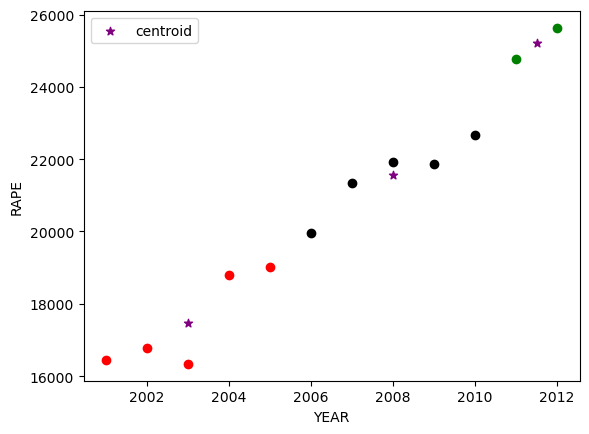

In [19]:
df1 = rape[rape.cluster==0]
df2 = rape[rape.cluster==1]
df3 = rape[rape.cluster==2]

plt.scatter(df1.YEAR,df1['RAPE'],color='green')
plt.scatter(df2.YEAR,df2['RAPE'],color='red')
plt.scatter(df3.YEAR,df3['RAPE'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('YEAR')
plt.ylabel('RAPE')
plt.legend()

In [20]:
scaler = MinMaxScaler()

scaler.fit(rape[['RAPE']])
rape['RAPE'] = scaler.transform(rape[['RAPE']])

In [21]:
rape.head()

,YEAR,RAPE,cluster
0,2001,0.012807,1
1,2002,0.047245,1
2,2003,0.000000,1
3,2004,0.263345,1
4,2005,0.288420,1


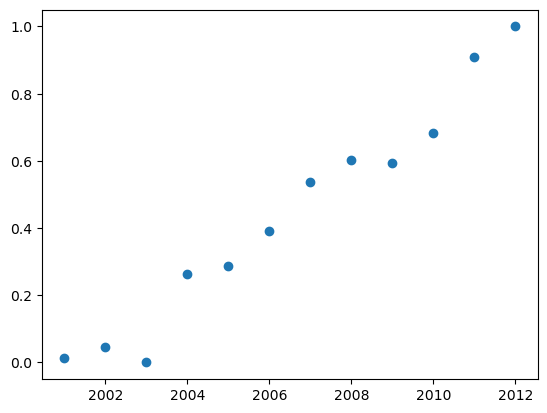

In [22]:
plt.scatter(rape.YEAR,rape['RAPE'])

In [23]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(rape[['YEAR','RAPE']])
y_predicted

array([2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1])

In [24]:
rape['cluster']=y_predicted
rape.head()

,YEAR,RAPE,cluster
0,2001,0.012807,2
1,2002,0.047245,2
2,2003,0.000000,2
3,2004,0.263345,2
4,2005,0.288420,0


In [25]:
km.cluster_centers_

array([[2.00650000e+03, 4.54907447e-01],
       [2.01050000e+03, 7.96491606e-01],
       [2.00250000e+03, 8.08491175e-02]])

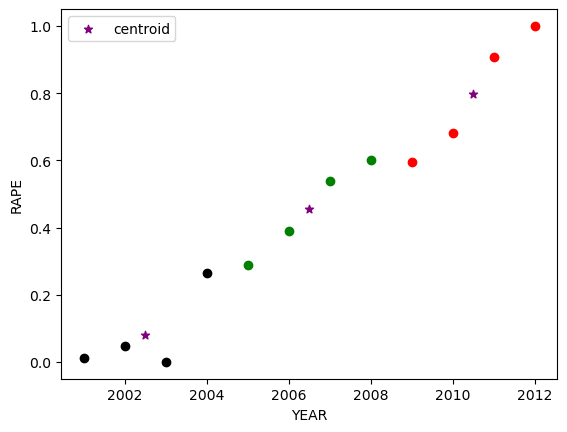

In [26]:
df1 = rape[rape.cluster==0]
df2 = rape[rape.cluster==1]
df3 = rape[rape.cluster==2]

plt.scatter(df1.YEAR,df1['RAPE'],color='green')
plt.scatter(df2.YEAR,df2['RAPE'],color='red')
plt.scatter(df3.YEAR,df3['RAPE'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('YEAR')
plt.ylabel('RAPE')
plt.legend()

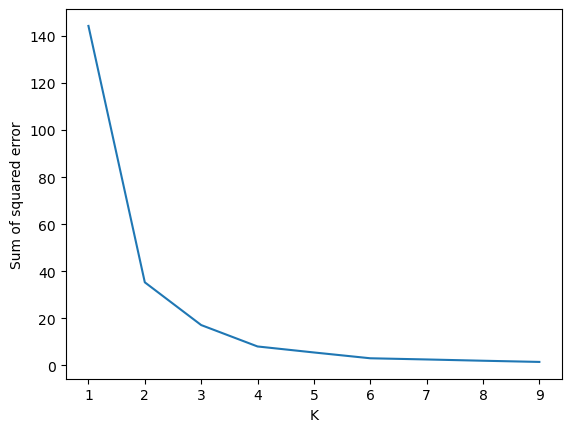

In [27]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(rape[['YEAR','RAPE']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [28]:
fig = px.bar(rape,x='YEAR',y='RAPE',color_discrete_sequence=['blue'])
fig.show()

In [29]:
rape_state = pd.DataFrame(crime.groupby(['STATE/UT'])['RAPE'].sum().reset_index())
rape_state.columns = ['STATE/UT','RAPE']
rape_state

,STATE/UT,RAPE
0,A & N ISLANDS,109
1,ANDHRA PRADESH,13479
2,ARUNACHAL PRADESH,500
3,ASSAM,16178
4,BIHAR,13124
5,CHANDIGARH,281
6,CHHATTISGARH,11838
7,D & N HAVELI,56
8,DAMAN & DIU,20
9,DELHI UT,12848


In [30]:
rape_state.head(10)

,STATE/UT,RAPE
0,A & N ISLANDS,109
1,ANDHRA PRADESH,13479
2,ARUNACHAL PRADESH,500
3,ASSAM,16178
4,BIHAR,13124
5,CHANDIGARH,281
6,CHHATTISGARH,11838
7,D & N HAVELI,56
8,DAMAN & DIU,20
9,DELHI UT,12848


In [31]:
fig = px.bar(rape_state,x='STATE/UT',y='RAPE',color_discrete_sequence=['blue'])
fig.show()

In [32]:
murder = pd.DataFrame(crime.groupby(['YEAR'])['MURDER'].sum().reset_index())
murder.columns = ['YEAR','MURDER']
murder

,YEAR,MURDER
0,2001,36749
1,2002,35821
2,2003,33201
3,2004,34089
4,2005,33174
5,2006,32957
6,2007,32813
7,2008,33320
8,2009,32921
9,2010,33900


In [33]:
fig = px.bar(murder,x='YEAR',y='MURDER',color_discrete_sequence=['blue'])
fig.show()